In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [12]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F493-C621

 C:\machine_learning_guide\Data\wine_classification 디렉터리

2023-04-12  오후 05:47    <DIR>          .
2023-04-12  오후 05:47    <DIR>          ..
2023-04-12  오후 03:02             6,905 baseline.csv
2023-04-12  오후 05:24             6,905 blended.csv
2023-04-12  오후 05:44             6,905 blended_2.csv
2023-04-12  오후 05:46             6,905 blended_3.csv
2023-04-12  오후 05:47             6,905 blended_4.csv
2023-04-12  오후 05:42             6,905 blended_7.csv
2023-04-12  오후 04:51             6,905 extra.csv
2023-04-12  오후 04:34             6,905 lightgbm.csv
2023-04-12  오후 05:47         3,003,234 logs.log
2023-04-12  오전 10:53             6,905 sample_submission.csv
2023-04-12  오전 10:53            73,676 test.csv
2023-04-12  오전 10:53           418,941 train.csv
              12개 파일           3,557,996 바이트
               2개 디렉터리  257,294,561,280 바이트 남음


In [13]:
cd C:\machine_learning_guide\Data\wine_classification

C:\machine_learning_guide\Data\wine_classification


In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [17]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [20]:
train['type']

0       1
1       0
2       1
3       1
4       1
       ..
5492    1
5493    1
5494    1
5495    1
5496    1
Name: type, Length: 5497, dtype: int32

In [21]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [22]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [23]:
train_x = train.drop(['index', 'quality'], axis=1)
train_y = train['quality']
test_x = test.drop('index', axis=1)

In [24]:
print(train['quality'].value_counts())

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


In [25]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.756595
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,1.000000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,1.000000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,1.000000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [26]:
train_auto = train.drop('index', axis=1)

In [27]:
train_auto

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


<Axes: >

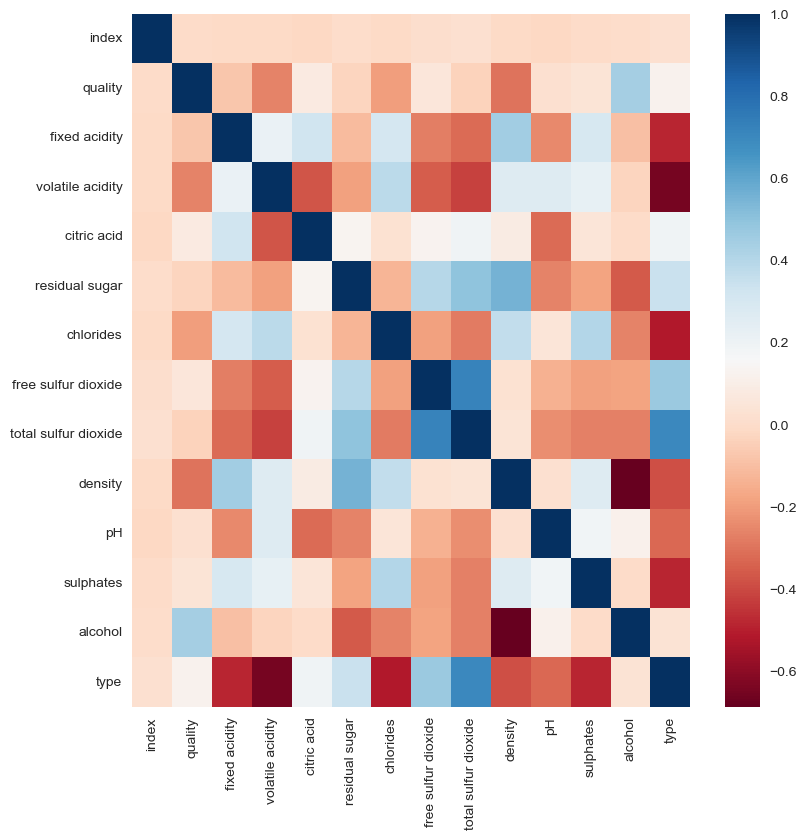

In [48]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

In [63]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
# oulier_idx = get_outlier(df=df, column='A', weight=1.5)
# df.drop(outlier_idx, axis=0, inplace=True)

In [68]:
outlier_index = get_outlier(df=train, column="density", weight=1.5)
print("이상치 인덱스 : ", outlier_index)

이상치 인덱스 :  Int64Index([], dtype='int64')


In [65]:
train.drop(outlier_index, axis=0, inplace=True)

In [69]:
outlier_index = get_outlier(df=train, column="alcohol", weight=1.5)
print("이상치 인덱스 : ", outlier_index)

이상치 인덱스 :  Int64Index([], dtype='int64')


In [67]:
train.drop(outlier_index, axis=0, inplace=True)

In [71]:
train.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [72]:
outlier_index = get_outlier(df=train, column="volatile acidity", weight=1.5)
print("이상치 인덱스 : ", outlier_index)

이상치 인덱스 :  Int64Index([   0,   23,   24,   36,   37,   41,   69,   84,   90,   98,
            ...
            5304, 5325, 5350, 5354, 5364, 5419, 5439, 5446, 5452, 5481],
           dtype='int64', length=313)


In [73]:
train.drop(outlier_index, axis=0, inplace=True)

In [74]:
train_x = train.drop(['index', 'quality'], axis=1)
train_y = train['quality']
test_x = test.drop('index', axis=1)

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5178 entries, 1 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5178 non-null   int64  
 1   quality               5178 non-null   int64  
 2   fixed acidity         5178 non-null   float64
 3   volatile acidity      5178 non-null   float64
 4   citric acid           5178 non-null   float64
 5   residual sugar        5178 non-null   float64
 6   chlorides             5178 non-null   float64
 7   free sulfur dioxide   5178 non-null   float64
 8   total sulfur dioxide  5178 non-null   float64
 9   density               5178 non-null   float64
 10  pH                    5178 non-null   float64
 11  sulphates             5178 non-null   float64
 12  alcohol               5178 non-null   float64
 13  type                  5178 non-null   int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 586.6 KB


In [75]:
from pycaret.classification import *
import optuna

In [76]:
# from pycaret.datasets import get_data
# juice = get_data('juice')

In [77]:
# Target Mappint : 3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6
exp_clf101 = setup(data=train_auto, 
                   target='quality', 
                   fold=5,
                   session_id=123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(5497, 13)"
5,Transformed data shape,"(5497, 13)"
6,Transformed train set shape,"(3847, 13)"
7,Transformed test set shape,"(1650, 13)"
8,Numeric features,12
9,Preprocess,True


In [78]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000001A25FA9C0D0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted, po...",pred,"{'average': 'weighted', 'pos_label': 9, 'label...",True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted,...",pred,"{'average': 'weighted', 'pos_label': 9, 'label...",True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted, pos_la...",pred,"{'average': 'weighted', 'pos_label': 9, 'label...",True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000001A25FA9C...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000001A25FA9C...,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [79]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [80]:
best_model = compare_models(fold=5, round=3, sort='Accuracy', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.638,0.661,0.638,0.644,0.622,0.430,0.436,0.326
rf,Random Forest Classifier,0.633,0.654,0.633,0.635,0.616,0.424,0.429,0.314
xgboost,Extreme Gradient Boosting,0.620,0.636,0.620,0.613,0.608,0.411,0.413,0.272
lightgbm,Light Gradient Boosting Machine,0.617,0.637,0.617,0.610,0.603,0.403,0.407,0.364
gbc,Gradient Boosting Classifier,0.573,0.605,0.573,0.565,0.556,0.326,0.333,0.378
dt,Decision Tree Classifier,0.542,0.525,0.542,0.546,0.543,0.322,0.323,0.452
lr,Logistic Regression,0.532,0.565,0.532,0.493,0.484,0.230,0.244,1.378
ridge,Ridge Classifier,0.530,0.000,0.530,0.475,0.461,0.217,0.236,0.264
lda,Linear Discriminant Analysis,0.530,0.576,0.530,0.509,0.506,0.250,0.257,0.266
qda,Quadratic Discriminant Analysis,0.472,0.550,0.472,0.488,0.471,0.240,0.244,0.262


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [81]:
best_model

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 XGBC

In [36]:
tuned_top5 = [tune_model(i) for i in best_model]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5403,0.7188,0.5403,0.5192,0.4946,0.2423,0.2597
1,0.5532,0.7239,0.5532,0.5137,0.5020,0.2638,0.2823
2,0.5098,0.0000,0.5098,0.4695,0.4604,0.1896,0.2036
3,0.5397,0.7248,0.5397,0.5136,0.4926,0.2425,0.2570
4,0.5631,0.7317,0.5631,0.5032,0.5088,0.2832,0.2993
Mean,0.5412,0.5799,0.5412,0.5038,0.4917,0.2443,0.2604
Std,0.0180,0.2900,0.0180,0.0179,0.0166,0.0313,0.0323


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5338,0.7158,0.5338,0.5387,0.4847,0.2208,0.2509
1,0.5117,0.6847,0.5117,0.4674,0.4767,0.2152,0.2215
2,0.5189,0.0000,0.5189,0.4857,0.4646,0.2041,0.2202
3,0.5423,0.7072,0.5423,0.5055,0.5128,0.2651,0.2718
4,0.5553,0.7093,0.5553,0.5078,0.5201,0.2898,0.2965
Mean,0.5324,0.5634,0.5324,0.5010,0.4918,0.2390,0.2522
Std,0.0157,0.2819,0.0157,0.0239,0.0213,0.0328,0.0294


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6390,0.8105,0.6390,0.6322,0.6295,0.4422,0.4448
1,0.6156,0.7933,0.6156,0.6067,0.6029,0.4042,0.4065
2,0.6333,0.0000,0.6333,0.6269,0.6220,0.4316,0.4339
3,0.6112,0.7871,0.6112,0.6064,0.6017,0.3965,0.3994
4,0.6177,0.8029,0.6177,0.6226,0.6038,0.4040,0.4071
Mean,0.6233,0.6388,0.6233,0.6190,0.6120,0.4157,0.4183
Std,0.0108,0.3195,0.0108,0.0106,0.0115,0.0179,0.0177


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5922,0.7779,0.5922,0.5783,0.5800,0.3681,0.3706
1,0.5909,0.7741,0.5909,0.5776,0.5782,0.3669,0.3689
2,0.6112,0.0000,0.6112,0.6107,0.5967,0.3903,0.3945
3,0.5696,0.7561,0.5696,0.5701,0.5592,0.3324,0.3341
4,0.6060,0.7816,0.6060,0.6009,0.5909,0.3816,0.3866
Mean,0.5940,0.6179,0.5940,0.5875,0.5810,0.3678,0.3709
Std,0.0145,0.3091,0.0145,0.0155,0.0129,0.0198,0.0208


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6221,0.7883,0.6221,0.6113,0.6115,0.4166,0.4193
1,0.6312,0.7948,0.6312,0.6188,0.6193,0.4282,0.4314
2,0.5878,0.0000,0.5878,0.5842,0.5843,0.3750,0.3757
3,0.5995,0.7790,0.5995,0.5920,0.5909,0.3814,0.3836
4,0.6203,0.7947,0.6203,0.6168,0.6114,0.4154,0.4172
Mean,0.6122,0.6314,0.6122,0.6046,0.6035,0.4033,0.4054
Std,0.0160,0.3157,0.0160,0.0139,0.0135,0.0211,0.0217


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [82]:
blended = blend_models(estimator_list = best_model,
                       fold = 10,
                       method = 'soft',
                       optimize='Accuracy',
                       )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6286,0.0000,0.6286,0.6335,0.6184,0.4177,0.4233
1,0.6649,0.0000,0.6649,0.6620,0.6517,0.4758,0.4830
2,0.6519,0.0000,0.6519,0.6401,0.6360,0.4561,0.4609
3,0.6234,0.8168,0.6234,0.6399,0.6059,0.4049,0.4118
4,0.6416,0.8189,0.6416,0.6528,0.6333,0.4392,0.4459
5,0.6701,0.8502,0.6701,0.6884,0.6543,0.4829,0.4890
6,0.6182,0.8007,0.6182,0.6249,0.5966,0.3929,0.4028
7,0.6484,0.0000,0.6484,0.6517,0.6419,0.4541,0.4567
8,0.6667,0.0000,0.6667,0.6482,0.6485,0.4758,0.4811


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [83]:
final_model = finalize_model(blended)

In [84]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\junseok\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'tot...
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_samples_leaf=1,
                                                                          min_samples_split=2,
                                                                          min_weight_fraction_leaf=0.0,
                                                                          n_estimators=100,
                                                                          n_iter_no_change=None,
                                                                          random_state=123,
                                                                          subsample=1.0,
                                                                          tol=0.0001,
                                                                          validation_fraction=0.1,
                                                                          verbose=0,
                                                                          warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

In [85]:
test_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0


In [86]:
predictions = predict_model(final_model, data = test_x)

In [87]:
predictions

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,prediction_label,prediction_score
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1,5,0.4032
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0,6,0.4740
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1,6,0.5687
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1,5,0.6478
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1,6,0.5291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0,6,0.5860
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1,6,0.4698
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0,5,0.7394
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0,6,0.6831


In [88]:
predictions['prediction_label'].value_counts()

6    501
5    354
7    123
8     13
4      9
Name: prediction_label, dtype: int64

In [89]:
blended_pred = predictions['prediction_label']

In [90]:
blended_pred

0      5
1      6
2      6
3      5
4      6
      ..
995    6
996    6
997    5
998    6
999    6
Name: prediction_label, Length: 1000, dtype: int8

In [91]:
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = blended_pred
submission.to_csv("IQR_blended_5.csv", index=False)

In [92]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [133]:

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train , X_test , y_train , y_test = train_test_split(train_x , train_y , test_size=0.2 , random_state=0)

In [134]:

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression()

In [ ]:
# train_x = train.drop(['index', 'quality'], axis=1)
# train_y = train['quality']
# test_x = test.drop('index', axis=1)

In [124]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=100,
                   random_state=None)

In [125]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

# print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
# print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
# print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
# print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

In [126]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 1036)
(1036, 4)


In [127]:
pred

array([[5, 7, 7, 6],
       [5, 7, 7, 6],
       [4, 6, 7, 6],
       ...,
       [7, 7, 7, 3],
       [6, 6, 6, 6],
       [5, 5, 5, 3]], dtype=int64)

In [108]:
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = pred
submission.to_csv("stacking.csv", index=False)

In [128]:
lr_final.fit(pred, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
final = lr_final.predict(pred)

In [130]:
final

array([7, 7, 6, ..., 6, 6, 5], dtype=int64)

In [131]:
lr_final.predict(test_x)

ValueError: X has 12 features, but LogisticRegression is expecting 4 features as input.

In [135]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [136]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, train_x, train_y, test_x, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, train_x, train_y, test_x, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, train_x, train_y, test_x,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, train_x, train_y, test_x, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 


KeyError: "None of [Int64Index([ 740,  741,  742,  743,  744,  745,  746,  747,  748,  749,\n            ...\n            5168, 5169, 5170, 5171, 5172, 5173, 5174, 5175, 5176, 5177],\n           dtype='int64', length=4438)] are in the [columns]"

In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))